In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

In [2]:
phot=fits.open('modp020_chabrier_MW_cluster_phot.fits')
prop=fits.open('modp020_chabrier_MW_cluster_prop.fits')

print(len(phot))

238


In [3]:
for i in range(len(phot)):
    if i!=0:
        print(i, phot[i].data.columns)

1 ColDefs(
    name = 'Trial'; format = '1K'
    name = 'UniqueID'; format = '1K'
    name = 'Time'; format = '1D'; unit = 'yr'
)
2 ColDefs(
    name = 'QH0'; format = '1D'; unit = 'phot/s'
)
3 ColDefs(
    name = 'QHe0'; format = '1D'; unit = 'phot/s'
)
4 ColDefs(
    name = 'QHe1'; format = '1D'; unit = 'phot/s'
)
5 ColDefs(
    name = 'Lbol'; format = '1D'; unit = 'Lsun'
)
6 ColDefs(
    name = 'GALEX_FUV'; format = '1D'; unit = 'Vega mag'
)
7 ColDefs(
    name = 'GALEX_NUV'; format = '1D'; unit = 'Vega mag'
)
8 ColDefs(
    name = 'WFC3_UVIS_F218W'; format = '1D'; unit = 'Vega mag'
)
9 ColDefs(
    name = 'WFC3_UVIS_F225W'; format = '1D'; unit = 'Vega mag'
)
10 ColDefs(
    name = 'WFC3_UVIS_F275W'; format = '1D'; unit = 'Vega mag'
)
11 ColDefs(
    name = 'WFC3_UVIS_F336W'; format = '1D'; unit = 'Vega mag'
)
12 ColDefs(
    name = 'WFC3_UVIS_F360W'; format = '1D'; unit = 'Vega mag'
)
13 ColDefs(
    name = 'WFC3_UVIS_F438W'; format = '1D'; unit = 'Vega mag'
)
14 ColDefs(
    name 

118 ColDefs(
    name = '2MASS_H_neb'; format = '1D'; unit = 'Vega mag'
)
119 ColDefs(
    name = '2MASS_Ks_neb'; format = '1D'; unit = 'Vega mag'
)
120 ColDefs(
    name = 'QH0_ex'; format = '1D'; unit = 'phot/s'
)
121 ColDefs(
    name = 'QHe0_ex'; format = '1D'; unit = 'phot/s'
)
122 ColDefs(
    name = 'QHe1_ex'; format = '1D'; unit = 'phot/s'
)
123 ColDefs(
    name = 'Lbol_ex'; format = '1D'; unit = 'Lsun'
)
124 ColDefs(
    name = 'GALEX_FUV_ex'; format = '1D'; unit = 'Vega mag'
)
125 ColDefs(
    name = 'GALEX_NUV_ex'; format = '1D'; unit = 'Vega mag'
)
126 ColDefs(
    name = 'WFC3_UVIS_F218W_ex'; format = '1D'; unit = 'Vega mag'
)
127 ColDefs(
    name = 'WFC3_UVIS_F225W_ex'; format = '1D'; unit = 'Vega mag'
)
128 ColDefs(
    name = 'WFC3_UVIS_F275W_ex'; format = '1D'; unit = 'Vega mag'
)
129 ColDefs(
    name = 'WFC3_UVIS_F336W_ex'; format = '1D'; unit = 'Vega mag'
)
130 ColDefs(
    name = 'WFC3_UVIS_F360W_ex'; format = '1D'; unit = 'Vega mag'
)
131 ColDefs(
    name = 'WF

In [4]:
prop[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   88 / length of dimension 1                          
NAXIS2  =             10000000 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   11 / number of table fields                         
TTYPE1  = 'Trial   '                                                            
TFORM1  = '1K      '                                                            
TTYPE2  = 'UniqueID'                                                            
TFORM2  = '1K      '                                                            
TTYPE3  = 'Time    '        

In [7]:
age=prop[1].data['Time']
mass=prop[1].data['LiveMass']
av=prop[1].data['A_V']
q0=np.array(phot[2].data).astype(float)
fesc=0.5
lha=(1.37e-12)*q0*fesc

# NGC 1566 from Santoro et al. 2021
lcom=36.77
lmin=37.14
lmax=40.53
# NGC 1566 median GMC mass and LHa from catalog
mgmc=3.56e6
lmed=37.46

sel0=(age>1e6)*(age<9e6)*(av<0.5)*(av<1.5)
sel=(age>1e6)*(age<9e6)*(av<0.5)*(av<1.5)*(np.log10(lha)>lcom)*(np.log10(lha)<lmax)

dmbin=0.1
mbins=np.arange(2, 6, dmbin)+dmbin/2
lhabins=np.zeros_like(mbins)

for i in range(len(mbins)):
    binsel=(np.log10(mass[sel0])>mbins[i]-dmbin/2)*(np.log10(mass[sel0])<mbins[i]+dmbin/2)
    lhabins[i]=np.log10(np.median(lha[sel0][binsel]))
    
print(mbins, lhabins)


medmc=np.median(mass[sel])
#medmc=3.3e3
sfe=0.1
Ntot=mgmc*sfe/medmc

print(Ntot)


# This is wrong. I need to integrate a cluster mass function above a certain limit! 
# A lot of the stellar mass (mgmc*sfe) forms into low mass clusters with no ionizing stars.



/Users/gblancm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


[2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75 2.85 2.95 3.05 3.15 3.25 3.35
 3.45 3.55 3.65 3.75 3.85 3.95 4.05 4.15 4.25 4.35 4.45 4.55 4.65 4.75
 4.85 4.95 5.05 5.15 5.25 5.35 5.45 5.55 5.65 5.75 5.85 5.95] [33.99784369 34.54924749 34.9533656  35.31323078 35.62947958 35.92931879
 36.15364579 36.31602802 36.51266245 36.68893031 36.84916206 37.00824657
 37.16886489 37.30722562 37.44846125 37.58757414 37.72255064 37.85332401
 37.99508941 38.13678691 38.28061186 38.39936562 38.53702982 38.62132258
 38.75758054 38.86943769 38.97404479 39.08371748 39.18583828 39.31881498
 39.42457117 39.4992751  39.61654564 39.66634804 39.82725353 39.90985352
 39.94437658 39.99318127 40.21768454 40.25404964]
78.77807684468796
38.613556680500025
38652.20888938941


In [19]:
mcmax=1e7
mcmin=1e2
mclim=1e3

A=mgmc*sfe/np.log(mcmax/mcmin)
Ntot=A*(1/mclim-1/mcmax)
print(Ntot)
print(A)


30.91867493480038
30921.76711151153


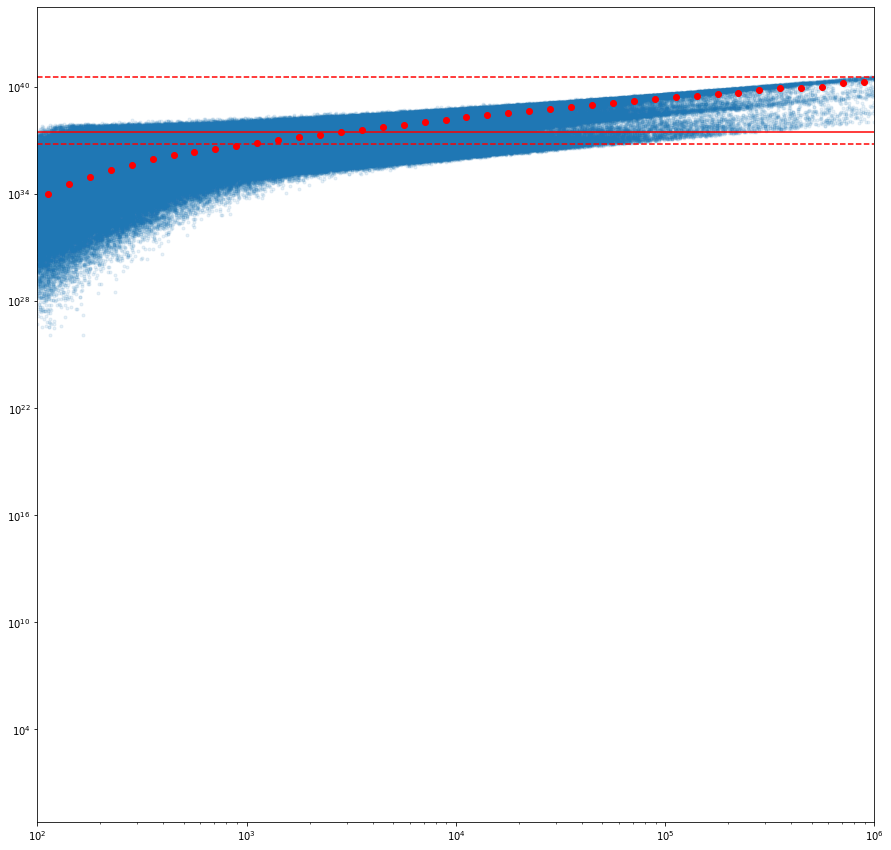

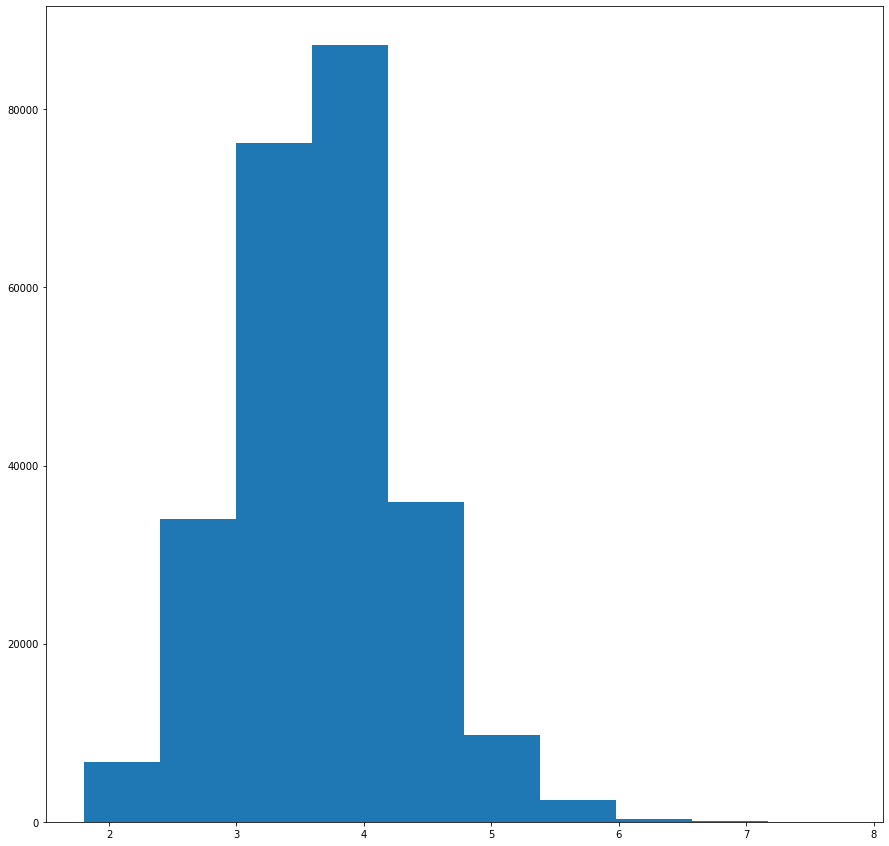

In [68]:


fig1,ax1=plt.subplots(figsize=(15, 15))
ax1.plot(mass[sel0], lha[sel0], '.', alpha=0.1)
ax1.plot(10**mbins, 10**lhabins, 'o', color='red')
#ax1.plot(mass[sel], lha[sel], '.', alpha=0.1, color='red')
ax1.axhline(10**lcom, linestyle='--', color='red')
ax1.axhline(10**lmax, linestyle='--', color='red')
ax1.axhline(10**lmed, color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e2, 1e6)
plt.show()

fig2,ax2=plt.subplots(figsize=(15, 15))
ax2.hist(np.log10(mass[sel]))
plt.show()



2.302585092994046